# 画像データの多クラス分類(digits編)

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# データの読み込み


In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# ラベルの観察
- 各ラベルのデータ数はおおよそ均衡
    - 現状、追加でデータを集める必要はなさそう


In [4]:
labels = digits.target

labels.shape

(1797,)

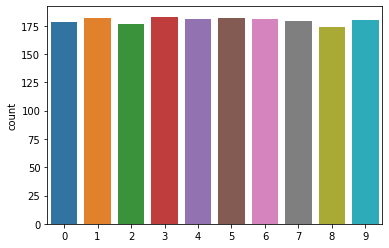

In [5]:
sns.countplot(labels)

# 入力データの観察

In [6]:
digits.data.shape

(1797, 64)

In [7]:
images = digits.data.reshape(-1, 8, 8)

images.shape

(1797, 8, 8)

Text(0.5, 1.0, 'Label=0')

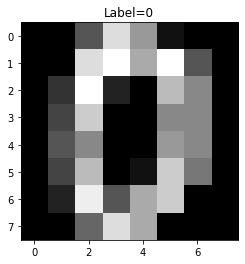

In [8]:
# 画像を確認する
idx = 0

plt.imshow(images[idx], cmap='gray')
plt.title(f'Label={labels[idx]}')

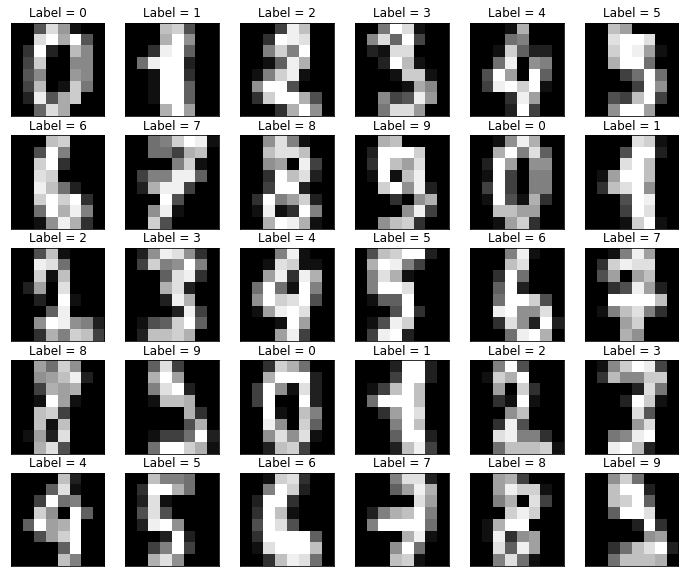

In [9]:
# 複数の画像を同時に確認する(先頭からN件)
plt.figure(figsize=(12, 10))

row, col = 6, 5

for i in range(row * col):
    plt.subplot(col, row, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label = {labels[i]}')

    # 軸の目盛りは邪魔なので削除(8px x 8px なのはわかっている)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [10]:
# ラベルは数字順に並んでいるのでは？ → 最初だけっぽい
labels[:100].reshape(-1, 10)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 9, 5, 5, 6, 5, 0, 9, 8, 9],
       [8, 4, 1, 7, 7, 3, 5, 1, 0, 0],
       [2, 2, 7, 8, 2, 0, 1, 2, 6, 3],
       [3, 7, 3, 3, 4, 6, 6, 6, 4, 9],
       [1, 5, 0, 9, 5, 2, 8, 2, 0, 0],
       [1, 7, 6, 3, 2, 1, 7, 4, 6, 3],
       [1, 3, 9, 1, 7, 6, 8, 4, 3, 1]])

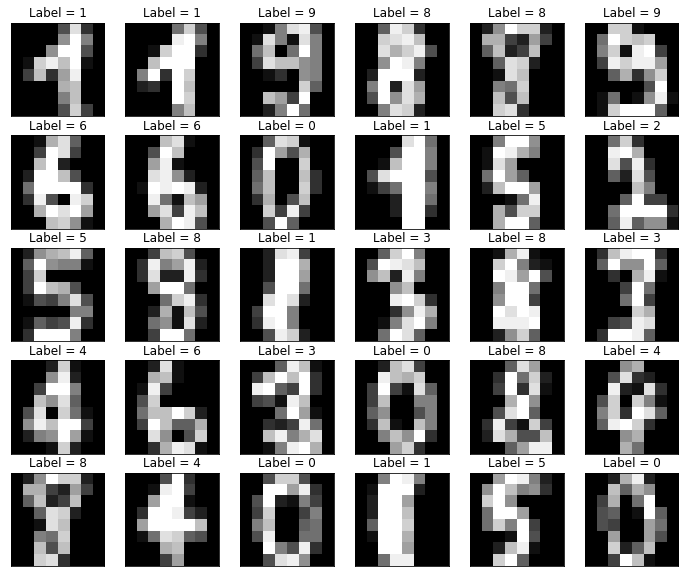

In [11]:
# 複数の画像を同時に確認する(ランダムにN件)
plt.figure(figsize=(12, 10))

row, col = 6, 5

for i in range(row * col):
    plt.subplot(col, row, i + 1)

    random_idx = np.random.randint(0, len(digits.data) - 1)
    plt.imshow(images[random_idx], cmap='gray')
    plt.title(f'Label = {labels[random_idx]}')

    # 軸の目盛りは邪魔なので削除(8px x 8px なのはわかっている)
    plt.xticks([])
    plt.yticks([])

plt.show()

# 予測モデルを構築

In [12]:
from sklearn.model_selection import StratifiedKFold, train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data,
                                                          digits.target,
                                                          train_size=0.7,
                                                          random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                                      y_trainval,
                                                      train_size=0.7,
                                                      random_state=0)

print(X_train.shape, X_valid.shape, X_test.shape)

(879, 64) (378, 64) (540, 64)


In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(f'Train Acc: {logreg.score(X_train, y_train):.4f}')
print(f'Valid Acc: {logreg.score(X_valid, y_valid):.4f}')
print(f'Test Acc: {logreg.score(X_test, y_test):.4f}')

Train Acc: 1.0000
Valid Acc: 0.9550
Test Acc: 0.9407


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print(f'Train Acc: {dt.score(X_train, y_train):.4f}')
print(f'Valid Acc: {dt.score(X_valid, y_valid):.4f}')
print(f'Test Acc: {dt.score(X_test, y_test):.4f}')

Train Acc: 1.0000
Valid Acc: 0.8439
Test Acc: 0.8204


# 次元削減を利用した可視化


## 主成分分析
- 入力変数が正規分布に従っているときに適した変換なので、特殊な分布を持つデータへの変換にはあまり向いていない

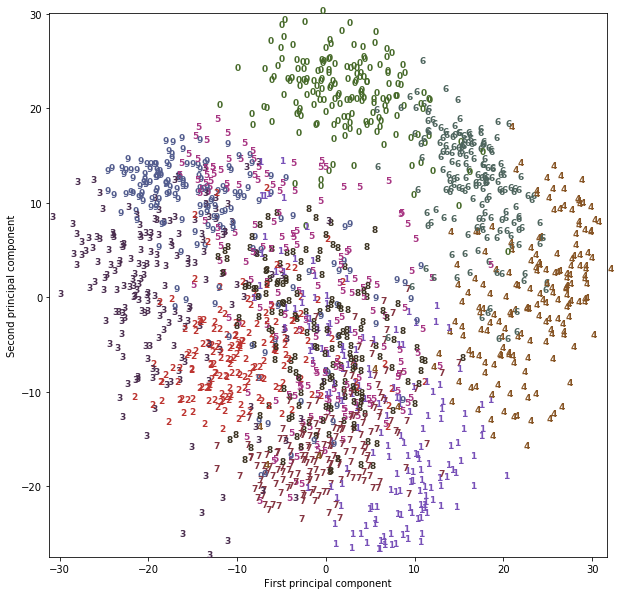

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)  # 数値データを最初の 2 主成分で変形
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
          '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0],
             digits_pca[i, 1],
             str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

## t-SNE

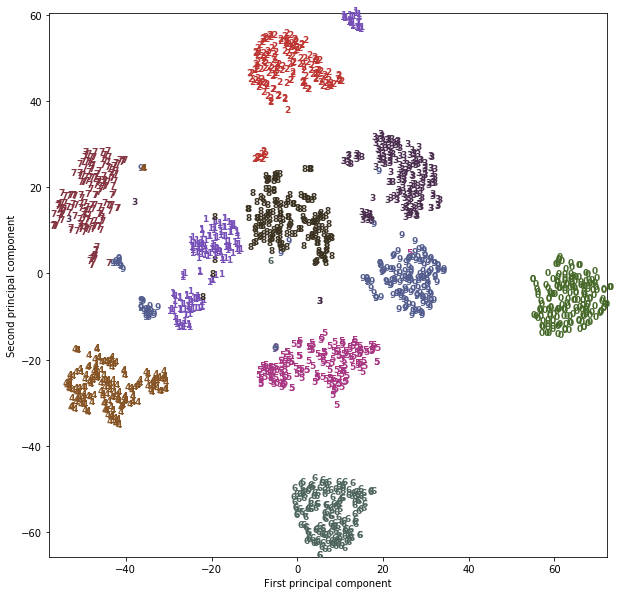

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)  # fit ではなく fit_transform を用いる。
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0],
             digits_tsne[i, 1],
             str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold',
                       'size': 9})
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')

In [26]:
logreg.fit(digits_tsne, digits.target)
logreg.score(digits_tsne, digits.target)

0.9148580968280468

おわり